# Лабораторная работа #2

## Цель работы:
Исследовать принцип работы сети Хопфилда и её сходимость к
аттракторам, применение сети Хопфилда для распознавания образов./

## Ход работы

1. Ознакомится с базовыми понятиями
2. Получить индивидуальный вариант:

    2.1 Размер изображения в пикселях
   
    2.2 Вид графических символов
   

4. Ознакомиться с приёмами изменения размерности в библиотеке Numpy
5. Создать (вручную, либо рисованием и загрузкой) 4-6 изображений заданного размера, соответвующие следующим требованиям:
  - одно изображение - один уникальный символ;
  - символы должны различаться большим количеством пикселей, избегайте визуально схожих (пример не подходящих: символ букв "O" и "Q");
  - символ должен распологаться по центру изображения и занимать большую его прощадь;

6. Создать и обучить НС Хопфилда для отдельных комплектов изображений. Для каждого обучения получить тепловую карту весовых коэфф. и зафиксировать в отчёте. Комплекты изображений:
   - Единственное изображение №1
   - Единственное изображение №2
   - Единственное изображение №3
   - Пара №1 изображений
   - Пара №2 изображений
   - Группы из трех и более изображений

7. Провести опрос сети на всех исходных образцах. Результаты зафиксировать в отчёте.
8. Провести опрос сети на образце с искажениями:
    - Выбрать символ
    - Внести искажения путём замены значений пикселей
    - Подать изображение на вхож НС
    - Сравнить изображение на входе и выходе НС
    - Результаты зафиксировать в отчёте

## Требования к отчету
<font color='red'>
- Формат отчёта: *doc, *docx
<br>- Название отчета должно быть в формате: АВТ-0xx_ЛР-xx_Фамилия1_Фамилия2
<br>- Каждый участник бригады отсылает отчёт бригады в своем ЛК Диспейс</font>

1. Краткое описание и иллюстрации действий по ходу работы;
2. Выводы и краткие описания полученных результатов


## Дополнительные материалы
- Хайкин С., "Нейронные сети: полный курс", 2008, стр. 856, гл. 14.7. Модель Хопфилда
- Hopfield Networks is All You Need, URL: https://ml-jku.github.io/hopfield-layers/

# Подключение библиотек

Для выполнения работы потребуется установить дополнительную библиотеки:
- neurolab - с реализацией сетей Хопфилда.
- plotly - для отображения интерактивных графиков

Команда для установки:

    > pip3 install neurolab
    > pip3 install plotly

In [ ]:
# Вызов команды установки библиотеки из среды jupyter
#!pip3 install neurolab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/645.3 kB ? eta -:--:--
     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/645.3 kB 3.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 645.1/645.3 kB 10.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22181 sha256=a135a3f971da5ab3e25520e3d82d7a9946372267c1b40f95a3f0db389669fd61
  Stored in directory: /root/.cache/pip/wheels/1d/c0/44/7142fa43c89473c5e63a750a00224e5f9ec9ca80613de1f97d
Successfully built neurolab


In [2]:
# Проверка версий и пути к выбранному интерпретатору
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")

Версия Python - 3.11.5 (main, Sep  2 2023, 14:16:33) [GCC 13.2.1 20230801]
Путь к интерпретатору Python - /usr/bin/python


In [3]:
import numpy as np

In [4]:
import neurolab as nl

In [5]:
import matplotlib.pyplot as plt


In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

pio.renderers.default = "iframe"

In [7]:
import PIL
from PIL import ImageTk, Image, ImageDraw, ImageOps

import tkinter as tk
import datetime
import os

In [8]:
import glob

# Введение

Нейронная сеть Хопфилда является
полносвязной нейронной сетью с симметричной матрицей связей. Между сетями Хопфилда и рекуррентными (RNN) существуют различия
сети Хопфилда частный случай рекуррентными.

## Функции активации

Функции активации (activation), они же носят название передаточные (transfer), в НС осуществляют нелинейное преобразование, к пришедшим на вход данным. В используемом пакете `neurolab.trans.*` реализованы следующие функции

|Название| y|Описание|
|-|-|-|
|Competitive| [0, 1]| Зануляет все значения, кроме минимального|
|HardLim    | [0, 1]| Ступенчатая функция|
|HardLims   | [-1, 1]| Симметричная ступенчатая функция |
|LogSig     | [0, 1]| Логарифм сигмоиды |
|PureLin    | [-inf, +inf]| Линейная |
|SatLin     | [0, 1]| Линейная в интервале x=[0, 1], c насыщением вне интервала   |
|SatLinPrm  | [0, 1]| Линейная с параметрическим выводом |
|SatLins    | [-1, 1]| Симметричная линейная в интервале x=[0, 1], c насыщением вне интервала |
|SoftMax    | [-1, 1]| Softmax |
|TanSig     | [-1, 1]| Гиперболический тангенс |

Transfer functions, URL  https://pythonhosted.org/neurolab/lib.html#module-neurolab.trans

Осмотрим вид функций активации в зависимости от изменений аргумента.
График является интерактивным. Нажимая на название функции в легенде графика вы можете управлять его отображением.

In [9]:
# задать область определений
x = np.linspace(start=-5, stop=5, num=1000)

# Перечислить интересующие ф. активации в словаре (хэш-таблице)
funcActDict = {
     'Competitive': nl.trans.Competitive(),
     'HardLim'    : nl.trans.HardLim(),   #  0, 1
     'HardLims'   : nl.trans.HardLims(),  # -1, 1
     'LogSig'     : nl.trans.LogSig(),    #  0, 1
     'PureLin'    : nl.trans.PureLin(),   #  -inf, +inf
     'SatLin'     : nl.trans.SatLin(),    #  0, 1
     'SatLinPrm'  : nl.trans.SatLinPrm(), #  0, 1
     'SatLins'    : nl.trans.SatLins(),   # -1, 1
     'SoftMax'    : nl.trans.SoftMax(),
     'TanSig'     : nl.trans.TanSig(),    # -1, 1
    }

# Создать полотно для графика
fig = make_subplots(rows=1, cols=1)

# Вычислить зн. y и отобразить для каждого соотвествующей функции

for funcName in funcActDict.keys():
    func = funcActDict[funcName]
    y = func(x)
    fig.add_trace(go.Scatter(   x=x,   y=y, name=funcName,), row=1, col=1)
fig.update_layout(height=600, width=600,  title_text="Вид функций активации")
fig.update_layout(hovermode='x unified')
fig.update_layout(yaxis_range=[-1.5, 1.5])
fig.show()

# Подготовка данных

Растровые изображения могут быть представлены как матрица значений пикселей, определённой размерности.

## Измерение мерности массива Numpy

Библиотека NumPy для работы с многомерными массивами содержит ряд функций, используемых в данной работе.

Для освоения некоторых приёмов работы, создадим объект `myList` с типом данных `list`.

In [10]:
myList = [1,2,3,4,5,6,7,8,9,10,11,12,]
print(myList)
print('type  = ', type(myList))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
type  =  <class 'list'>


Функция `np.array(array_like)` и `np.asfarray(array_like)`, принимая списочную структуру, создаёт новый массив с типом данных `numpy.ndarray`.

In [11]:
myNumpyArr = np.asfarray( myList )
print(myNumpyArr)
print('type  = ', type(myNumpyArr))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
type  =  <class 'numpy.ndarray'>


Объект массив Numpy содержит атрибут `.shape`, который возвращает текущую размерность массива.

In [12]:
print(myNumpyArr)
print('shape = ', myNumpyArr.shape)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
shape =  (12,)


Размерность массива можно изменять, "переупаковывая значения" в одно-, двух, многомерное представление исходного. Для этого используется функция `.reshape( новый_размер )`, где новый размер может быть указан единственным положительным целым числом, либо последовательностью таких чисел. Допустимо использовать в качестве нового размера значение `-1`, для автоматического подбора допустимого значения.

In [13]:
myNumpyArr= myNumpyArr.reshape(3,4)
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (3, 4)
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [14]:
myNumpyArr= myNumpyArr.reshape(4,3)
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (4, 3)
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [15]:
myNumpyArr= myNumpyArr.reshape(-1,2)
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (6, 2)
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]
 [11. 12.]]


In [16]:
myNumpyArr= myNumpyArr.reshape(3,2,2)
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (3, 2, 2)
[[[ 1.  2.]
  [ 3.  4.]]

 [[ 5.  6.]
  [ 7.  8.]]

 [[ 9. 10.]
  [11. 12.]]]


Для преобразования в одномерный массив можно использовать функцию `.ravel()`, либо `.reshape(-1)`

In [17]:
myNumpyArr = myNumpyArr.ravel()
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (12,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


## Создание набора изображений

Для дальнейшей работы с нейронной сетью Хопфилда потребуются 4-10 изображений(образцов), каждое из которых должно содержать уникальный символ. Для начала размеры изображений выберем не более 10x10 пикселей.  Одиночные изображения позднее должны быть объединены в массив обучающего набора `targetList`.

Изображения(образцы) вы можете получить двумя способами:
1. Вручную создавать одномерные массивы, где значения будут интерпретироваться как яркость пикселей.
2. Нарисовать, сохранить изображения в графическом окне. Использовать загрузку сохранённых файлов-изображений.

### Способ 1. Ручное создание и наполнение одномерных массивов.

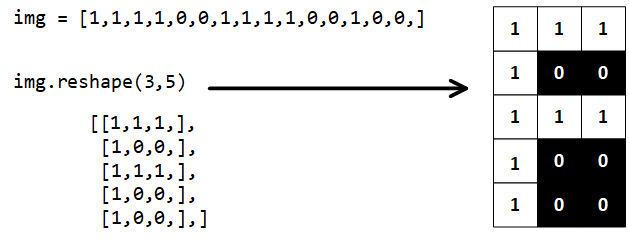

Каждое отдельное изображение может быть представлено в виде знаний массива (списка list в python).

In [73]:
symbol0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # Изображение HxW. Символ - круг
           0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
           0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
           0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
           0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
           0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
           0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
           0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
           0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          ]

symbol1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # Изображение HxW. Символ - крест
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
           0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          ]

symbol2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # Изображение HxW. Символ - треугольник
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
           0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
           0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
           0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
           0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
           0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
           0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          ]

# symbol0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # Изображение HxW. Символ - круг
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#           ]


In [74]:
print(symbol0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Объединим отдельные изображения в обучающий набор `targetList`.

Используйте комбинацию клавиш `Ctrl+/` для быстрой постановки и снятия комментариев

In [75]:
targetList = list() # создать пустой список

targetList.append(symbol0)  # добавить изображение в список
targetList.append(symbol1)
targetList.append(symbol2)
# ...
print('targetList. Тип данных ', type(targetList))
print('targetList. Кол-во элементов ', len(targetList))

print(targetList)

targetList. Тип данных  <class 'list'>
targetList. Кол-во элементов  3
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


### Способ 2. Использование сохранённых файлов-изображений.

#### Создание и сохранение изображений используя графическое окно. Tkinter.

Для более удобного создания изображений вы можете использовать графическое окно рисования.

Определим переменные: `imgH`, `imgW` -размеры каждого изображения и `pathFotImgs` путь хранения файлов.

In [ ]:
myImgH = 10
myImgW = 10
myPathFotImgs = 'imgsHopfield'

Следующий код подготовит отдельное графическое окно с областью для рисования.

<font color='red'>
Внимание! Данный способ создания окна для рисования изображений не сработает при работе в GoogleColab и расчитан на работу в локальном режиме установки jupyter.
</font>

In [ ]:
class myWinTK ():
    ''' Класс графического окна для рисования изображений '''

    def getImage(self):
        _image = Image.fromarray( self.output_numpy*255.0, ).convert( mode='1') #  преобразовать к массиву значений, конвертировать в черно/белый
        #_image = _image.resize((self.widthSave, self.heightSave), PIL.Image.BILINEAR)  # привести к размеру
        #print(f'getImage  {_image.size}, type {type(_image)})
        return _image

    def saveToFileFunc(self):
        ''' сохранить изображение '''
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
        filename = f'img_{timestamp}'
        filepathBig   = os.path.join(self.pathFotImgs,   '_smallResizedFromBig_'+filename+'.png')
        filepathSmall = os.path.join(self.pathFotImgs, f'[{self.widthSave},{self.heightSave}]'              +filename+'.png')

        _saved_image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        _saved_image.save(filepathSmall, quality=100, subsampling=0) # сохранить
        print(f"Изображение сохранено {filepathSmall}")

    def drawGrid(self, workCanvas):
        # нанести сетку только для окна рисования (не применяется к финальному изображению)
        for ih in range(0, self.heightGUI//self.gridSize): # по высоте горизонтальные
            workCanvas.create_line(0,                 self.gridSize*ih*1, self.widthGUI,      self.gridSize*ih*1, fill='#555555')
        for iw in range(0 ,self.widthGUI//self.gridSize): # по ширине вертикальные
            workCanvas.create_line(self.gridSize*iw*1,                 0, self.gridSize*iw*1, self.heightGUI,     fill='#555555')

    def clearFunc(self):
        ''' очистить поле '''
        self.output_numpy[:] = 0
        self.draw.rectangle((0, 0, self.widthGUI, self.heightGUI), fill=(0, 0, 0, 0))
        self.canvasTk.delete("all")
        self.canvasTk.create_rectangle(0, 0, self.widthGUI, self.heightGUI, fill='black')
        self.drawGrid(workCanvas = self.canvasTk)
        if self.modelForPredictTensorflow is not None:
            self.T.delete('1.0', tk.END)
        if self.modelForPredictHopfield is not None:
            self.canvasHopfieldOut.delete("all")
            self.drawGrid(workCanvas = self.canvasHopfieldOut)

    def calcXY(self,nx,ny):
        grxScaled=nx*self.gridSize # масштабирование до видимого интерфейса
        gryScaled=ny*self.gridSize
        x1, y1 = grxScaled, gryScaled # вычисление углов масштабированого пикселя для до видимого интерфейса
        x2, y2 = (grxScaled + self.gridSize), (gryScaled + self.gridSize)
        return x1, y1, x2, y2

    def paintFunc(self,event):
        ''' нанести точку '''
        if  event.x>= self.widthGUI or event.y >=self.heightGUI :  return
        grx=event.x//self.gridSize # округление до номера клеток
        gry=event.y//self.gridSize
        x1, y1, x2, y2 = self.calcXY(nx=grx,ny=gry)

        colorName= None
        if event.num == 1 or event.state==264:
            colorName = "white"
            colorBin = 1
        elif event.num == 3 or event.state==1032:
            colorName = "black"
            colorBin = 0
        if colorName:
            # видимый интерфейс
            self.canvasTk.create_rectangle(x1, y1, x2, y2, fill=colorName, width=1) #gridSize-1
            # полотно для сохранения
            self.draw.rectangle((x1, y1, x2, y2), fill=(255, 255, 255, 0))
            self.output_numpy[gry, grx] = colorBin

    def predictFromDraw(self):
        ''' Подать изображение с полотна на вход модели НС для классификаии '''
        _image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        numpy_array = np.array(_image, dtype=float)

        # Опрос модели
        with tf.device('/CPU:0'):
            # Переупаковка единственного изображения для подачи на вход НС
            numpy_array = numpy_array.reshape(1, self.widthSave, self.heightSave)
            #print("predictFromDraw:", numpy_array.shape)

            # Вызов ф. predict - вычисление одиночного ответа
            y_pred = model.predict(numpy_array)
            maxProbClass = tf.argmax(y_pred, axis=1).numpy()[0]

            # Вывод ответа в текстовое поле
            self.T.delete('1.0', tk.END)
            self.T.insert(tk.END,f'Ответы НС\n(макс. вероятн. Класс_{maxProbClass}):\n')
            for i, probability in enumerate(y_pred[0]):
                self.T.insert(tk.END, f'  Выч. класс_{i}: {probability:>7.1%}\n' )

    def hopfieldNetFunc(self):
        _image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        numpy_array = np.array(_image, dtype=float)

        # Получить ответ
        out = self.modelForPredictHopfield.sim(
                                                input=numpy_array.reshape(1,-1) )
        out = out.reshape(numpy_array.shape[0],numpy_array.shape[1]) # приведение к массива размерности (H*W,) к (H,W)

        self.canvasHopfieldOut.delete("all") # очистить поле рисования второго окна

        for (col,row), val in np.ndenumerate( out ): # отобразить графически ответ НС - уставноить цвет областей "пикселей"
            if val==1:
                x1, y1, x2, y2 = self.calcXY(nx=row,ny=col)
                self.canvasHopfieldOut.create_rectangle(x1, y1, x2, y2, fill='white', width=1) #gridSize-1

        self.drawGrid(workCanvas = self.canvasHopfieldOut) # нанести сетку


    def __init__(self, imgW=50, ImgH=50, gridSize=None, modelTensorflow = None, modelHopfield=None, pathFotImgs = 'imgs'):
        '''
        imgW=50, ImgH=50,  - размер выходного сохраняемого изображения, в пикселях
        gridSize=None, - размер пикселя-клетки при рисовании в графическом интрфейсе
        modelTensorflow = None, - обученная модель TensorFlow для классификации
        modelHopfield   = None, - обученная модель библиотеки neurolab

        pathFotImgs = 'imgs' - путь для сохранения изображений
        '''
        self.widthSave, self.heightSave = imgW, ImgH
        self.gridSize    = gridSize
        if self.gridSize is None:
            maxSide = max(self.widthSave, self.heightSave)
            if maxSide<10: self.gridSize = 300//maxSide
            else:          self.gridSize = 400//maxSide
        self.widthGUI,  self.heightGUI  = self.widthSave*self.gridSize, self.heightSave*self.gridSize  #размер видимого окна
        print(f'Размер изображения ШхВ = {self.widthSave}х{self.heightSave} пикс.')

        self.output_image    = PIL.Image.new("RGB", (self.widthGUI, self.heightGUI), (0,0,0)) # PIL Изображение
        self.draw            = PIL.ImageDraw.Draw(self.output_image)                          # поле для рисования
        self.output_numpy = np.zeros((self.heightSave, self.widthSave,),dtype=int)         # массив для значений пикселей

        # Графический интерфейс
        rootWindow = tk.Tk() # основное окно
        self.canvasTk = tk.Canvas(rootWindow, width=self.widthGUI, height=self.heightGUI, bg='black')
        self.canvasTk.bind("<B1-Motion>", self.paintFunc)
        self.canvasTk.bind("<B3-Motion>", self.paintFunc)
        self.canvasTk.bind("<Button-1>",  self.paintFunc)
        self.canvasTk.bind("<Button-3>",  self.paintFunc)
        self.canvasTk.pack(expand=tk.YES, fill=tk.BOTH)
        self.drawGrid(workCanvas = self.canvasTk)

        self.canvasHopfieldOut=None # поле для рисования второго окна для вывода ответов НС Хопфилда

        self.modelForPredictTensorflow = modelTensorflow # объекты обученных НС для получения ответов
        self.modelForPredictHopfield   = modelHopfield

        # Элементы интерфейса в зависимости от режима
        if self.modelForPredictTensorflow is not None:
            print('РЕЖИМ РАБОТЫ: классификация нарисованного изображения')
            buttonPredict=tk.Button(text="Распознать",command=self.predictFromDraw)
            buttonPredict.config(bg='#CCCCFF')
            buttonPredict.pack()
            self.T = tk.Text(rootWindow, height = 6, width = 30)
            self.T.pack()
        elif self.modelForPredictHopfield is not None:
            print('РЕЖИМ РАБОТЫ: ассоциация сетью Хопфилда')
            buttonHopfieldNet=tk.Button(text="Получить ответ от сети Хопфилда",command=self.hopfieldNetFunc)
            buttonHopfieldNet.config(bg='#CCCCFF')
            buttonHopfieldNet.pack()
            hopfielWindow = tk.Toplevel() # второе окно для вывода ответов НС Хопфилда
            hopfielWindow.title("Вывод сети Хопфилда")
            hopfielWindow.attributes("-topmost",True) # видимость: окно появится на переднем плане, поверх всех других
            self.canvasHopfieldOut = tk.Canvas(hopfielWindow, width=self.widthGUI, height=self.heightGUI, bg='black') # объекты обученных НС для получения ответов
            self.canvasHopfieldOut.pack()
            self.drawGrid(workCanvas = self.canvasHopfieldOut)
        else:
            print('РЕЖИМ РАБОТЫ: рисование и сохранение изображений')
            # Проверка наличия и создание директории для изображений
            self.pathFotImgs = pathFotImgs
            print('Диретория для сохранения изображений: ', end='')
            if not os.path.exists(self.pathFotImgs):
                os.mkdir(self.pathFotImgs)
                print(f"Создана {os.path.join(os.getcwd(), self.pathFotImgs)}")
            else:
                print(f"Найдена {os.path.join(os.getcwd(), self.pathFotImgs)}")

            buttonSave=tk.Button(text="Сохранить в файл",command=self.saveToFileFunc)
            buttonSave.config(bg='#CCFFCC')
            buttonSave.pack()
        buttonClear=tk.Button(text="Очистить",command=self.clearFunc)
        buttonClear.config(bg='#FFCCCC')
        buttonClear.pack()
        my_label = tk.Label(rootWindow, text = "После рисования и обработки\n нужного кол-ва изображений\n обязательно закройте это окно")   #  , font= ('Aerial', 17))
        my_label.pack()

        #----------------------------
        rootWindow.title("Область рисования")
        rootWindow.attributes("-topmost",True) # видимость: окно появится на переднем плане, поверх всех других
        rootWindow.resizable(False, False)
        rootWindow.mainloop()                  # отобразить окно

Выполнение следующей команды создаст и отобразит графическое окно.

 - При нажатии на кнопку "Сохранить" содержимое окна будет сохранено в файл-изображение во вложенную папку "./imgs".  
 - Левая кнопка мыши задаёт белый цвет клетки
 - Правая кнопка мыши задаёт чёрный цвет клетки

Эта команда является блокирующей дальнейшее выполнение кода. **Обязательно закройте графическое окно** перед выполнением дальнейших команд.

In [ ]:
#Создать экземпляр окна и отобразить
myWinTK (
    imgW=myImgW, ImgH=myImgH,   # размер выходного сохраняемого изображения, в пикселях
    pathFotImgs= myPathFotImgs, # путь для сохранения изображений
);

Размер изображения ШхВ = 10х10 пикс.
РЕЖИМ РАБОТЫ: рисование и сохранение изображений
Диретория для сохранения изображений: Найдена c:\Users\user\Desktop\---\NNaNK.2023.09\hopfield\imgsHopfield


#### Загрузка файлов-изображений

Осмотрим содержимое выбранной папки используя функцию `glob`, которая найдет все пути, попадающие под заданный шаблон.

In [ ]:
filePathPattern = myPathFotImgs+'/*.*'
print (f'Содержимое папки по шаблону поиска "{filePathPattern}"')
fileNameList = glob.glob(myPathFotImgs+'/*.*')

for fileName in fileNameList:
    name, ext = os.path.splitext(fileName)
    print(f'- Файл Расширение:"{ext.upper()}"  Имя: {fileName}')

Содержимое папки по шаблону поиска "imgsHopfield/*.*"
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-05-51.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-06-00.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-38-30.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-39-35.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-40-38.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-10-09.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-15-48.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-16-58.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-19-12.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-20-25.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-21-01.png
- Файл Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-23-38.pn

Используем функцию `Image.open` библиотеки PIL для чтения файлов-изображений с диска.
Объединим отдельные изображения в обучающий набор `targetList`.

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-05-51.png
Размер изоб.: (10, 10)


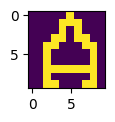

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-06-00.png
Размер изоб.: (10, 10)


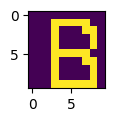

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-38-30.png
Размер изоб.: (10, 10)


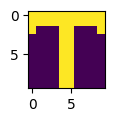

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-39-35.png
Размер изоб.: (10, 10)


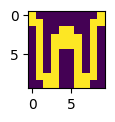

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-12-21-40-38.png
Размер изоб.: (10, 10)


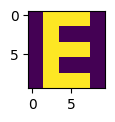

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-10-09.png
Размер изоб.: (10, 10)


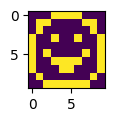

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-15-48.png
Размер изоб.: (10, 10)


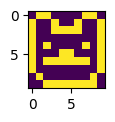

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-16-58.png
Размер изоб.: (10, 10)


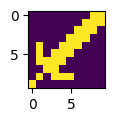

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-19-12.png
Размер изоб.: (10, 10)


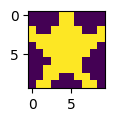

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-20-25.png
Размер изоб.: (10, 10)


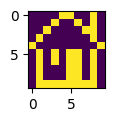

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-21-01.png
Размер изоб.: (10, 10)


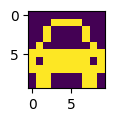

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-23-38.png
Размер изоб.: (10, 10)


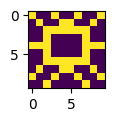

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[10,10]img_2023-10-13-00-24-42.png
Размер изоб.: (10, 10)


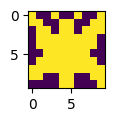

In [ ]:
targetList = list() # создать пустой список

for fileName in fileNameList:
    name, ext = os.path.splitext(fileName)
    print(f'- Файл. Расширение:"{ext.upper()}"  Имя: {fileName}')

    if ext.upper() in ['.BMP', '.PNG', '.JPG' ]: # Проверить тип файла
        im = Image.open(fileName)  # Загрузить файл
        im = im.convert(mode='1')  # Конвертировать в черно/белый, иначе останется 3-цветовых канада
        imNumpy = np.asfarray(im)  # Преобразовать в массив значений
        print('Размер изоб.:', imNumpy.shape)
        targetList.append(imNumpy) # Добавить изображение в список

        #print(imNumpy)
        plt.figure(figsize=(1,1))  # Создать полотно для рисования, figsize-размер в дюймах
        plt.imshow(imNumpy)        # Отобразить массив как изображение
        plt.show()

- - -

## Обработка полученого списка изображений

В результате предыдущих шагов `targetList` список (`list` python) должен содержать несколько одиночных изображений.

In [76]:
print('targetList. Тип данных ', type(targetList))
print('targetList. Кол-во элементов ', len(targetList))
#print(targetList) # осмотр содержимого

targetList. Тип данных  <class 'list'>
targetList. Кол-во элементов  3


Создадим `targetNumpy` - массив Numpy с имеющимися изображениями. Для работы НС Хопфилда необходимо заменить все нулевые значения на -1.0, т.е. обеспечить биполярные значения +1.0, либо -1.0.

In [77]:
targetNumpy = np.asfarray(targetList)  # Создать массив Numpy, тип данных - вещественное число
print('targetNumpy. Тип данных ', type(targetNumpy))
print('targetNumpy shape = ', targetNumpy.shape)

targetNumpy[targetNumpy == 0] = -1.0   # Замена всех ячеек с "0" на "-1"

targetNumpy. Тип данных  <class 'numpy.ndarray'>
targetNumpy shape =  (3, 100)


Осмотрим содержимое массива. Обратите внимание на размерность изображений.

In [78]:
targetNumpy # осмотр содержимого

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
        -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
        -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
         1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1

В зависимости от предыдущих шагов, может потребоваться переупакавать массивы командой `.reshape(кол-во изображений, высота, ширина)`.

In [79]:
targetNumpy = targetNumpy.reshape(-1, 10, 10) # "-1" - автоподбор кол-ва изображений, "10" - кол-во строк, "10" - кол-во столбов
print('targetNumpy shape = ', targetNumpy.shape)
targetNumpy # осмотр содержимого

targetNumpy shape =  (3, 10, 10)


array([[[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.],
        [-1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.],
        [-1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.],
        [-1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.],
        [-1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.],
        [-1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.],
        [-1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.],
        [-1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.],
        [-1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.],
        [-1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.],
        [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.],
        [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.],
        [-1., -1., -1., -1.,  1.,  1.,

Осмотрим каждый элемент массива `targetNumpy`. Используем функцию `matplotlib.pyplot.imshow`, которая отображает полученый набор значений в графическом виде.

img shape =  (10, 10)


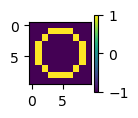

img shape =  (10, 10)


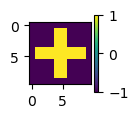

img shape =  (10, 10)


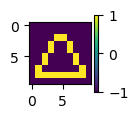

In [80]:
for img in targetNumpy:
    print('img shape = ',img.shape)
    plt.figure(figsize=(1,1)) # создать полотно для рисования, figsize-размер в дюймах
    plt.imshow(               # отобразить массив как изображение
       img,         # данные
       #cmap='gray' # название цветовой шкалы
    )
    plt.colorbar()            # отобразить цветовую шкалу
    #plt.axis(False)          # отключить подписи осей
    plt.show()                # отрисовать содержимое полотна

# Нейронная сеть Хопфилда

## Выбор состава обучающей части

Перед построением НС еще раз проверим размерность полученных образцов.

In [36]:
print('targetNumpy shape = ', targetNumpy.shape)
print('  кол-во изображений = ', targetNumpy.shape[0])
print('  размерность каждого изображения = ', targetNumpy.shape[1:])

targetNumpy shape =  (3, 10, 10)
  кол-во изображений =  3
  размерность каждого изображения =  (10, 10)


Выберем из исходных изображений некоторые по их порядковым номерам (индексам), и сформируем новый комплект `choosenTargetNumpy` - набор для очередного обучения НС. Для выбора подмассивов из исходного используем функцию `numpy.take`.

==Осмотр полученого комплекта==
img shape =  (10, 10)


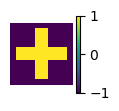

img shape =  (10, 10)


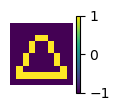

In [103]:
selectedIndexes = [1, 2] # индексы (порядковые номера) выбранных

selectedTargetNumpy = np.take( # выбрать указанные подмассивы по индексам
    a=targetNumpy,           # общий массив
    indices=selectedIndexes, # индексы (порядковые номера) выбранных
    axis=0                   # режим навигации в многомерном массиве
)

print('==Осмотр полученого комплекта==')
for img in selectedTargetNumpy:
    print('img shape = ',img.shape)
    plt.figure(figsize=(1,1)) # создать полотно для рисования, figsize-размер в дюймах
    plt.imshow(               # отобразить массив как изображение
       img,         # данные
       #cmap='gray' # название цветовой шкалы
    )
    plt.colorbar()            # отобразить цветовую шкалу
    plt.axis(False)          # отключить подписи осей
    plt.show()                # отрисовать содержимое полотна

Значения в массиве `selectedTargetNumpy` и `targetNumpy` хранятся в естественной для изображений размерности, эта же размерность позволяет напрямую передавать изображения в функции отображения на экран графических библиотек.

Нейросеть Хопфилда ожидает в качестве обучающих данных массив особой размерности: состоящий из одного и более **одномерных** векторов.
Следовательно массив `targetNumpy` размерностью (N, H, W) из N изображений размером H x W, должен быть преобразован к (N, H*W).

Для преобразования к требуемой размерности используем функцию `.reshape(кол-во изображений, -1)`, где второй параметр позволит развернуть каждое изображение в одномерный вектор. Проверим ёё работу.

In [104]:
countOfImgs = selectedTargetNumpy.shape[0] # кол-во изображений
print('shape = ',                        selectedTargetNumpy.reshape(countOfImgs,-1).shape)
print('  кол-во изображений = ',         selectedTargetNumpy.reshape(countOfImgs,-1).shape[0])
print('  размерность каждого изображения = ', selectedTargetNumpy.reshape(countOfImgs,-1).shape[1:])

print('Содержимое массива')
#choosenTargetNump.reshape( # ф. изменения размерности (кол-во образцов, -1)
#    countOfImgs,          # кол-во изображений
#    -1                    # новый размер
#)

shape =  (2, 100)
  кол-во изображений =  2
  размерность каждого изображения =  (100,)
Содержимое массива


## Создадим и обучим НС Хопфилда на выбранных образцах

Для создания НС Хопфилда воспользуемся пакетом neurolab и конструктором

`neurolab.net.newhop(target, transf=None, max_init=10, delta=0)`, со следующими параметрами

    - target:   Обучающий массив из одного и более образцов - одномерных векторов (N, h*w)
    - transf:   Функция активации
    - max_init: Макс. рекуррентных итераций
    - delta: Минимальна разность между 2 выходами для остановки цикла (по умолч 0.0)

В данная реализации НС обучение происходи в момент создания и объект не содержит отдельной функции дополнительного обучения. Содержит единственный полносвязный слой

In [105]:
# Создать и обучить НС
net = nl.net.newhop(
    target   = selectedTargetNumpy.reshape(countOfImgs, -1),  # Обучающие данные
    transf   = nl.trans.HardLims(),  # Функция активации nl.trans.TanSig(), nl.trans.HardLims()
    max_init = 10,                 # Макс. рекуррентных итераций
    delta    = 0.0
)

## Осмотр карты весовых коэфф.

Получим общее кол-во слоёв НС.

In [106]:
print('Кол-во слоёв нейросети Хопфилда = ', len (net.layers))

Кол-во слоёв нейросети Хопфилда =  1


Весовые коэфф. слоя хранятся в структуре словарь(хэш-таблица) и доступны по ключам `w` и `b`.

In [107]:
net.layers[0].np.keys()

dict_keys(['w', 'b'])

Коэфф. НС представлены в виде матрицы с размером (`H*W` x `H*W`), где H*W - кол-во входных параметров, и отображает веса полносвязной структуры.

In [108]:
print('Размер матрицы весовых коэфф. = ', net.layers[0].np['w'].shape)
print(
    np.round ( # применить округление значений
        net.layers[0].np['w'], decimals=2) )

Размер матрицы весовых коэфф. =  (100, 100)
[[0.   0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.   0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.   ... 0.02 0.02 0.02]
 ...
 [0.02 0.02 0.02 ... 0.   0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.   0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.  ]]


Для удобства восприятия отобразим матрицу весов в виде тепловой карты.

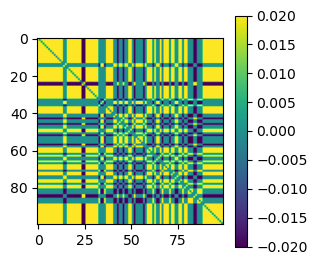

In [109]:
plt.figure(figsize=(3,3))          # создать полотно для рисования, figsize-размер в дюймах
plt.imshow(
    net.layers[0].np['w'],  # данные
    #cmap='gray', # название цветовой шкалы
    #vmin=-0.1,   # мин.  значение цветовой шкалы
    #vmax=0.1,    # макс. значение цветовой шкалы
)
plt.colorbar()            # отобразить цветовую шкалу
plt.show()                # отрисовать содержимое полотна

# Опрос нейронной сети

## Опрос по всем образцам

Для начала проверим как НС различает образцы, на которых она была обучена.
Для получения ответов НС используем функцию `.sim (input)`, где `input` - также массив из одного и более образцов - одномерных векторов (N, h*w).

In [110]:
# Получить ответы НС
output = net.sim(
    input=selectedTargetNumpy.reshape(countOfImgs, -1)
)
print('output shape =', output.shape)

output shape = (2, 100)


Обратите внимание, что ответ НС `output` также состоит из набора одномерных векторов, которые необходимо привести к размерности исходных изображений.

In [111]:
output = output.reshape( # перепаковать ответы НС к размерности изображений (N, h, w)
    output.shape[0],       # N - кол-во ответов НС
    selectedTargetNumpy.shape[1],  # h - высота исходного изобр.
    selectedTargetNumpy.shape[2],  # w - ширина исходного изобр.
)

Для наглядного сравнения входных значений и ответов НС отобразим эти пары в виде изображений.

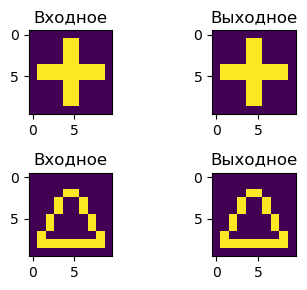

In [112]:
fig, axs = plt.subplots( # создать полотно сетку
    nrows=countOfImgs,          # кол-во строк = образцов
    ncols=2,                    # кол-во столбцов = 2
    figsize=(4, countOfImgs*1.5)
)

# для каждого изображений
for i, img in enumerate(selectedTargetNumpy):

    if countOfImgs ==1: # axs[номер строки][номер столбца]
        leftAx =  axs[0]
        rightAx =  axs[1]
    else:
        leftAx  = axs[i][0]
        rightAx = axs[i][1]

    leftAx.imshow(   # отобразить массив как тепловую карту
       selectedTargetNumpy[i],  # данные
       #cmap='gray'     # название цветовой шкалы
    )
    leftAx.set_title('Входное')

    rightAx.imshow(  # отобразить массив как тепловую карту
       output[i],      # данные
       #cmap='gray'    # название цветовой шкалы
    )
    rightAx.set_title('Выходное')
plt.tight_layout()

## Опрос по единственному образцу с искажениями

Выберем один из исходных символов, внеся в него искажения путём замены значений матрицы пикселей.

In [113]:
testImg = selectedTargetNumpy[1] # получить исходный символ из выбранного комплекта
testImg[testImg==-1] = 0 # для повышения читаемости произвести обратную замену -1 на 0
testImg

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Используем значения предыдущего вывода для создания нового массива `testImgNoised` (для быстрого редактирования вертикальной области используйте множественное выделение текста комбинацией SHIFT+ALT+CTRL+Левая кнопка мыши).

testImg shape =  (10, 10)


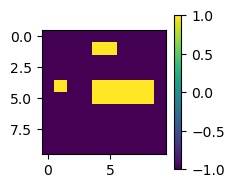

In [114]:
testImgNoised = np.asfarray(
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
            0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
])
testImgNoised = testImgNoised.reshape(10,10) # приведение к массива размерности (35,) к (7,5)
testImgNoised[testImgNoised==0] = -1 # замена нулей на -1
print('testImg shape = ', testImg.shape)

plt.figure(figsize=(2,2)) # создать полотно для рисования, figsize-размер в дюймах
plt.imshow( # отобразить массив как тепловую карту
    testImgNoised,        # данные
    #cmap='gray' # название цветовой шкалы
)
plt.colorbar()            # отобразить цветовую шкалу

Содержимое матрицы `testImgNoised` для передачи в НС должно быть преобразовано к массиву одномерных векторов. Выполнить эту операцию можно нескольким способами, например:
  - testImg.reshape(1,-1)

In [115]:
testImgNoised.reshape(1,-1).shape

(1, 100)

In [119]:
# Получить ответ
out = net.sim(
    input=testImgNoised.reshape(1,-1) )

out = out.reshape(10,10) # приведение к массива размерности (H*W,) к (H,W)

Для сравнения входного и выходного изображения сопоставим их в графическом виде.

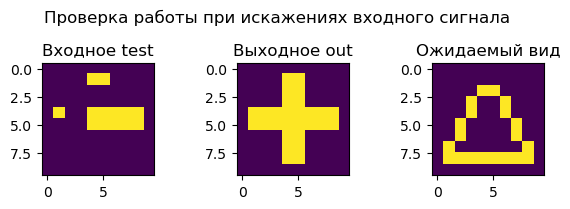

In [120]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(6, 2)) # создать несколько полотен для рисования, figsize-размер в дюймах, nrows - строк, ncols - столбцов
# axs[номер столбца]
axs[0].imshow(testImgNoised)
axs[1].imshow(out)
axs[2].imshow(testImg)
axs[0].set_title('Входное test')
axs[1].set_title('Выходное out')
axs[2].set_title('Ожидаемый вид')
fig.suptitle('Проверка работы при искажениях входного сигнала')
plt.tight_layout()

## Опрос по прямому графическому вводу

Используя графическое окно для рисования символов, проверьте влияния места расположения и степени искажений на ответы НС.

Запустите следующий код, в результате появится **два** окна. "Область рисования" предназначена для создания графического символа, при нажатии кнопки "Получить ответ" текущее содержимое будет передано на вход связанной НС. Ответ НС будет отображен в окне "Вывод сети Хопфилда". Обратите внимание на необходимость держать в соответствии размер поля для рисования и кол-во узлов (входов и выходов) НС.

Выполнение следующей команды создаст и отобразит графическое окно. Эта команда является блокирующей дальнейшее выполнение кода. **Обязательно закройте графическое окно** перед выполнением дальнейших команд.

In [ ]:
print(f'Кол-во узлов выбранной НС Хопфилда = {net.ci}')

Кол-во узлов выбранной НС Хопфилда = 100


In [ ]:
myWinTK (
    imgW=10, ImgH=10,  # размер поля для создания изображения
    modelHopfield=net,   # передать в качестве параметра обученную модель НС Хопфилда библиотеки neurolab
);

Размер изображения ШхВ = 10х10 пикс.
РЕЖИМ РАБОТЫ: ассоциация сетью Хопфилда


# Выводы


- Сделайте заключения и обобщения на основе полученных результатов;
- Оцените изменение карты весов при увеличении кол-ва запоминаемых сетью образцов;
- Оцените устойчивость НС к искажениям входных изображений;
- Оцените влияние вида символов в обучающем наборе на успешность его корректного распознавания;
- …
__________________________________
__________________________________
__________________________________
__________________________________
__________________________________